# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 591


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# defining the unit
units = "metric"

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city + "&appid=" + weather_api_key + "&units=" + units
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]['country']
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | wailua homesteads
Processing Record 2 of Set 1 | echuca
Processing Record 3 of Set 1 | waitangi
Processing Record 4 of Set 1 | margaret river
Processing Record 5 of Set 1 | podporozh'ye
Processing Record 6 of Set 1 | edinburgh of the seven seas
Processing Record 7 of Set 1 | georgetown
Processing Record 8 of Set 1 | tual
Processing Record 9 of Set 1 | kodiak
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | chonchi
Processing Record 12 of Set 1 | invercargill
Processing Record 13 of Set 1 | khandyga
Processing Record 14 of Set 1 | tiksi
Processing Record 15 of Set 1 | iqaluit
Processing Record 16 of Set 1 | neryungri
Processing Record 17 of Set 1 | yermakovskoye
Processing Record 18 of Set 1 | sisimiut
Processing Record 19 of Set 1 | petropavlovsk-kamchatsky
Processing Record 20 of Set 1 | antofagasta
Processing Record 21 of Set 1 | bethel
Processing Record 22 of S

Processing Record 36 of Set 4 | walvis bay
Processing Record 37 of Set 4 | bandar abbas
Processing Record 38 of Set 4 | metlili chaamba
Processing Record 39 of Set 4 | twon-brass
Processing Record 40 of Set 4 | east london
Processing Record 41 of Set 4 | spitak
Processing Record 42 of Set 4 | trinity beach
Processing Record 43 of Set 4 | holualoa
Processing Record 44 of Set 4 | hami
Processing Record 45 of Set 4 | hermanus
Processing Record 46 of Set 4 | salalah
Processing Record 47 of Set 4 | saurimo
Processing Record 48 of Set 4 | el granada
Processing Record 49 of Set 4 | millau
Processing Record 0 of Set 5 | newcastle west
Processing Record 1 of Set 5 | mount isa
Processing Record 2 of Set 5 | bridgetown
Processing Record 3 of Set 5 | oranjemund
Processing Record 4 of Set 5 | ad dawadimi
Processing Record 5 of Set 5 | pandan
Processing Record 6 of Set 5 | pisco
Processing Record 7 of Set 5 | ibra'
City not found. Skipping...
Processing Record 8 of Set 5 | weno
Processing Record 9 o

Processing Record 27 of Set 8 | 'ohonua
City not found. Skipping...
Processing Record 28 of Set 8 | tuam
Processing Record 29 of Set 8 | dudinka
Processing Record 30 of Set 8 | fisterra
Processing Record 31 of Set 8 | vrangel'
Processing Record 32 of Set 8 | famagusta
Processing Record 33 of Set 8 | sydney
Processing Record 34 of Set 8 | crane
Processing Record 35 of Set 8 | conde
Processing Record 36 of Set 8 | lihue
Processing Record 37 of Set 8 | vingt cinq
City not found. Skipping...
Processing Record 38 of Set 8 | toliara
Processing Record 39 of Set 8 | sechura
Processing Record 40 of Set 8 | qamdo
Processing Record 41 of Set 8 | page
Processing Record 42 of Set 8 | sao joao da barra
Processing Record 43 of Set 8 | devarkonda
Processing Record 44 of Set 8 | paradip garh
Processing Record 45 of Set 8 | zakynthos
Processing Record 46 of Set 8 | miquelon
Processing Record 47 of Set 8 | cedeira
Processing Record 48 of Set 8 | haapavesi
Processing Record 49 of Set 8 | freeport
Processi

Processing Record 15 of Set 12 | myrina
Processing Record 16 of Set 12 | freetown
Processing Record 17 of Set 12 | chrysoupolis
Processing Record 18 of Set 12 | buchloe
Processing Record 19 of Set 12 | sonsorol village
City not found. Skipping...
Processing Record 20 of Set 12 | tshikapa
Processing Record 21 of Set 12 | devinuwara
City not found. Skipping...
Processing Record 22 of Set 12 | bethanie
Processing Record 23 of Set 12 | nuuk
Processing Record 24 of Set 12 | coracao de jesus
Processing Record 25 of Set 12 | agboville
Processing Record 26 of Set 12 | darwin
Processing Record 27 of Set 12 | dodge city
Processing Record 28 of Set 12 | ylistaro
Processing Record 29 of Set 12 | lodwar
Processing Record 30 of Set 12 | dzuunharaa
Processing Record 31 of Set 12 | karachi
Processing Record 32 of Set 12 | monrovia
Processing Record 33 of Set 12 | tongerlo
Processing Record 34 of Set 12 | daru
Processing Record 35 of Set 12 | lautoka
Processing Record 36 of Set 12 | kalmunai
Processing

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          557
Lat           557
Lng           557
Max Temp      557
Humidity      557
Cloudiness    557
Wind Speed    557
Country       557
Date          557
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,wailua homesteads,22.0669,-159.3780,26.44,89,100,5.66,US,1691428136
1,echuca,-36.1333,144.7500,6.09,90,0,2.71,AU,1691428137
2,waitangi,-43.9535,-176.5597,7.68,62,100,5.32,NZ,1691428137
3,margaret river,-33.9500,115.0667,16.32,91,73,8.33,AU,1691428137
4,podporozh'ye,60.9112,34.1706,26.13,58,0,4.34,RU,1691428138


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,wailua homesteads,22.0669,-159.3780,26.44,89,100,5.66,US,1691428136
1,echuca,-36.1333,144.7500,6.09,90,0,2.71,AU,1691428137
2,waitangi,-43.9535,-176.5597,7.68,62,100,5.32,NZ,1691428137
3,margaret river,-33.9500,115.0667,16.32,91,73,8.33,AU,1691428137
4,podporozh'ye,60.9112,34.1706,26.13,58,0,4.34,RU,1691428138


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

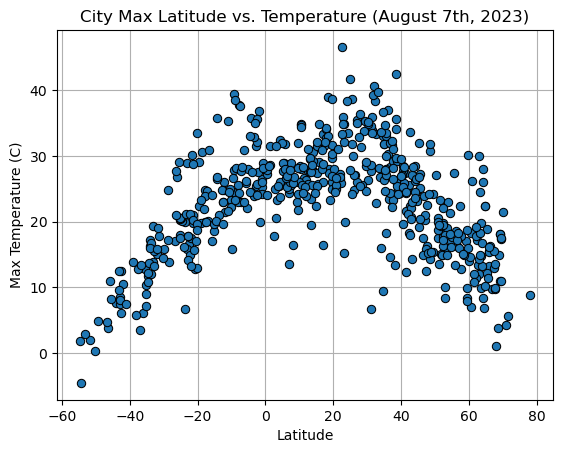

In [14]:
# Build scatter plot for latitude vs. temperature
plt.plot(city_data_df["Lat"], 
         city_data_df["Max Temp"],
         linestyle="none", 
         marker="o", 
         markeredgecolor="black", 
         markeredgewidth=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Temperature (August 7th, 2023)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

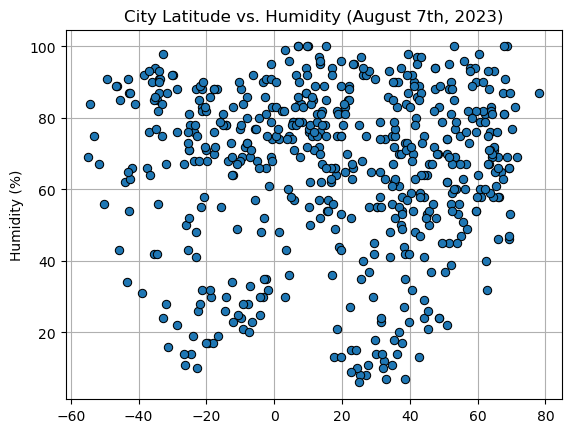

In [15]:
# Build the scatter plots for latitude vs. humidity
plt.plot(city_data_df["Lat"], 
         city_data_df["Humidity"],
         linestyle="none", 
         marker="o", 
         markeredgecolor="black", 
         markeredgewidth=0.75)

# Incorporate the other graph properties
# plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (August 7th, 2023)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

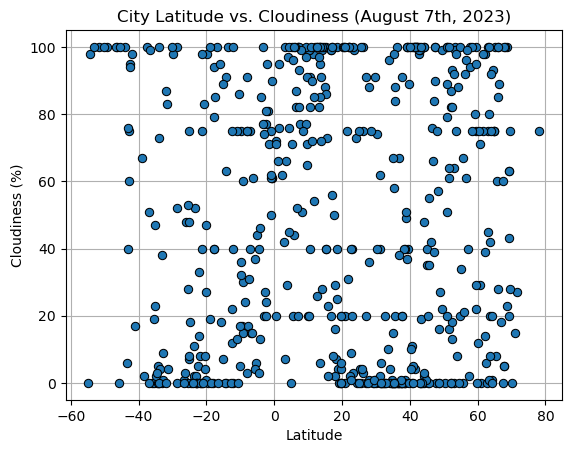

In [16]:
# Build the scatter plots for latitude vs. cloudiness
plt.plot(city_data_df["Lat"], 
         city_data_df["Cloudiness"], 
         linestyle="none", 
         marker="o", 
         markeredgecolor="black", 
         markeredgewidth=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (August 7th, 2023)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

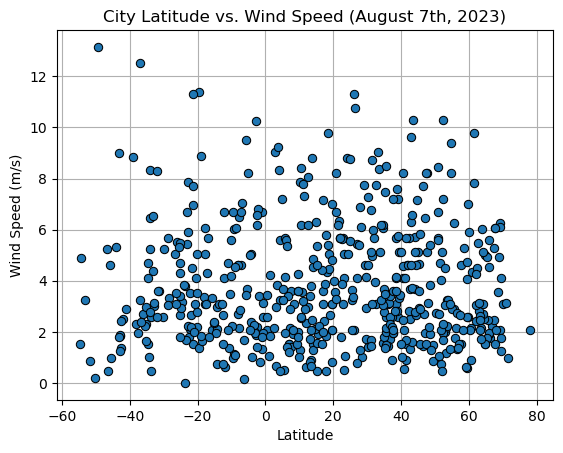

In [18]:
# Build the scatter plots for latitude vs. wind speed
plt.plot(city_data_df["Lat"], 
         city_data_df["Wind Speed"], 
         linestyle="none", 
         marker="o", 
         markeredgecolor="black", 
         markeredgewidth=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (August 7th, 2023)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [51]:
# Define a function to create Linear Regression plots
def linear_regression(x_values, y_values, x=0, y=0):
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, xy=(x, y), xycoords='axes fraction', fontsize=10, color="red")
    plt.xlabel ("Latitude")
    plt.ylabel (y_values.name)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [52]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,wailua homesteads,22.0669,-159.3780,26.44,89,100,5.66,US,1691428136
4,podporozh'ye,60.9112,34.1706,26.13,58,0,4.34,RU,1691428138
6,georgetown,5.4112,100.3354,28.96,79,20,0.51,MY,1691428138
8,kodiak,57.7900,-152.4072,12.73,94,100,4.63,US,1691428139
12,khandyga,62.6667,135.6000,13.43,32,0,5.46,RU,1691428140


In [53]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,echuca,-36.1333,144.7500,6.09,90,0,2.71,AU,1691428137
2,waitangi,-43.9535,-176.5597,7.68,62,100,5.32,NZ,1691428137
3,margaret river,-33.9500,115.0667,16.32,91,73,8.33,AU,1691428137
5,edinburgh of the seven seas,-37.0676,-12.3116,13.00,76,51,12.51,SH,1691428138
7,tual,-5.6667,132.7500,25.87,77,37,9.50,ID,1691428138


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.37333331089303484


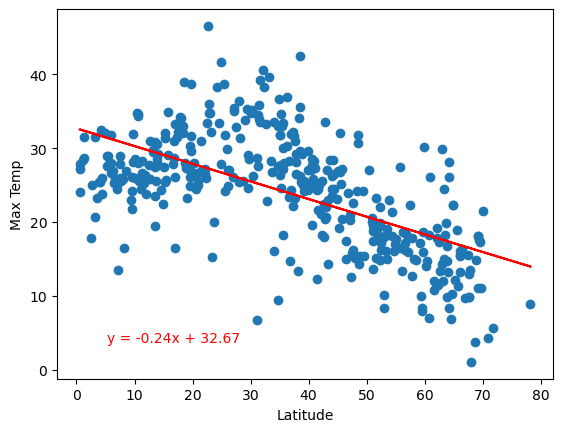

In [64]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

linear_regression(x_values, y_values, 0.1, 0.1)

The r-value is: 0.6949335310255423


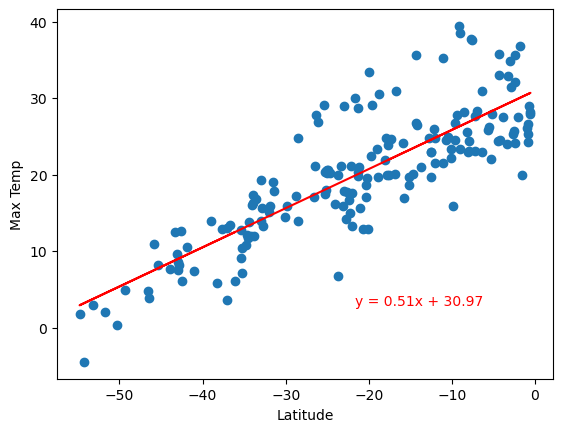

In [67]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

linear_regression(x_values, y_values, 0.6, 0.2)

**Discussion about the linear relationship:** 

Northern Hemisphere:
- There's a weak, negative correlation here, as the r-value is 0.37 (rounded).
- In much of the case, as the latitude of the area increases, the temp decreases.
- This realtionship makes sense in the nothern hemisphere.

Southern Hemisphere:
- There's a stronger, positive correlation here, as the r-value is 0.69 (rounded).
- The realtionship shows that as the lat increases, so does the temp.
- This relationship makes sense in the southern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.0009702010791843082


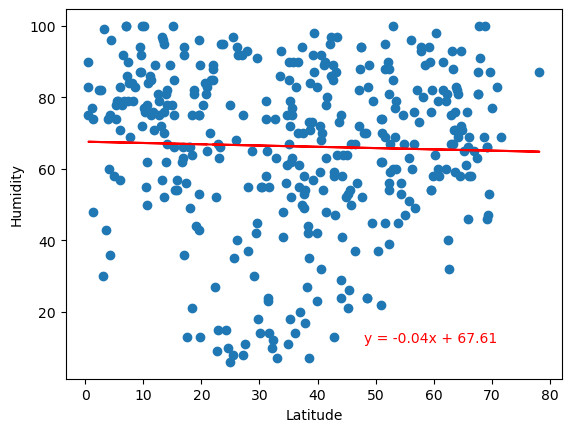

In [72]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
linear_regression(x_values, y_values, 0.6, 0.1)

The r-value is: 0.020519304553549843


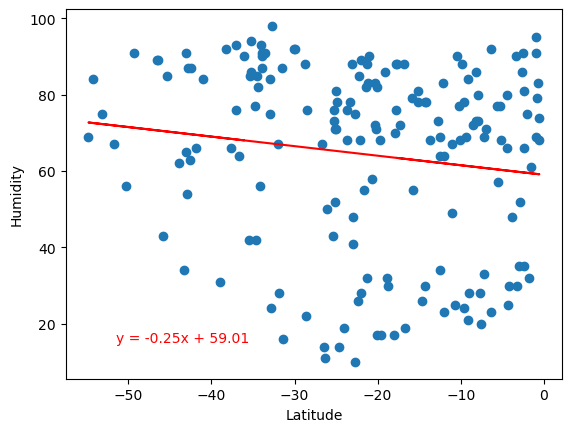

In [71]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
linear_regression(x_values, y_values, 0.1, 0.1)

**Discussion about the linear relationship:** 

Northern Hemisphere:
- There seems to be no correlation between humidity and latitude, given that the r-value is 0.001 (rounded).

Southern Hemisphere:
- There seems to be no correlation between humidity and latitude, given that the r-value is 0.02 (rounded).

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.009558240108432228


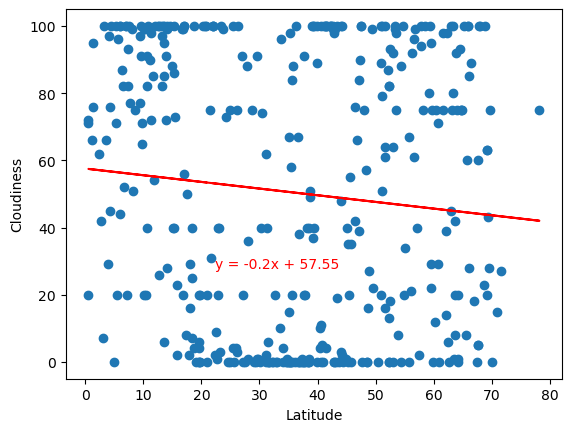

In [80]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
linear_regression(x_values, y_values, 0.3, 0.3)

The r-value is: 0.002004934481612727


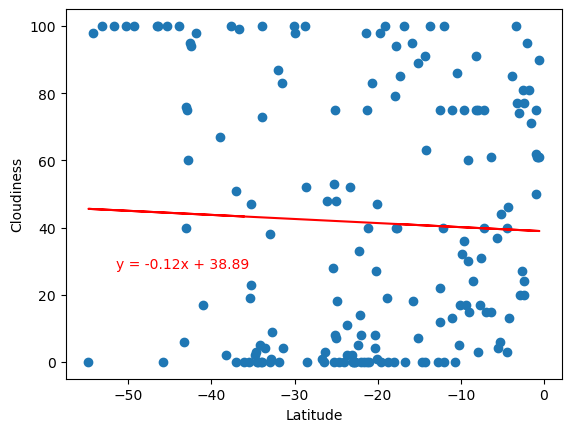

In [82]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
linear_regression(x_values, y_values, 0.1, 0.3)

**Discussion about the linear relationship:** 

Northern Hemisphere:
- There seems to be no correlation between cloudiness and latitude, given that the r-value is 0.001 (rounded).

Southern Hemisphere:
- There seems to be no correlation between cloudiness and latitude, given that the r-value is 0.002 (rounded).

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0014863324417202614


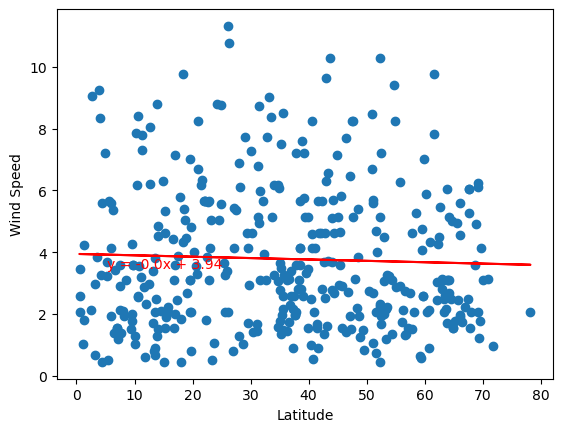

In [85]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
linear_regression(x_values, y_values, 0.1, 0.3)

The r-value is: 8.650292333546542e-05


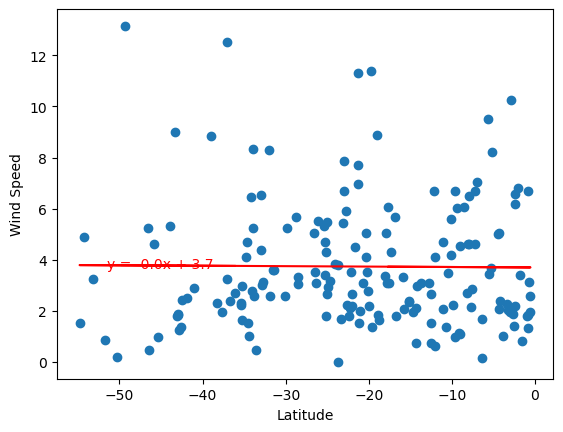

In [86]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
linear_regression(x_values, y_values, 0.1, 0.3)

**Discussion about the linear relationship:** 

Northern Hemisphere:
- There seems to be no correlation between wind speed and latitude, given that the r-value is 0.001 (rounded).

Southern Hemisphere:
- There seems to be no correlation between wind speed and latitude, given that the r-value is 0.00008 (rounded).